In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

#### Reference best focus manual

In [2]:
exp_type = 'peak_lwsi'

In [18]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing")
data_base_dir = autoalign_dir / exp_type / 'raw'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [19]:
data_base_dir

PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/peak_lwsi/raw')

### peak_lwsi_150_2022-11-19

In [20]:
!ls $data_base_dir

peak_lswi_moo_150_2022-11-19_images
peak_lswi_moo_150_2022-11-19_steps
peak_lswi_moo_autofocusing.ini
peal_lwsi_moo_optimization_final_150_2022-11-19_11:20.gz


Reference best focus


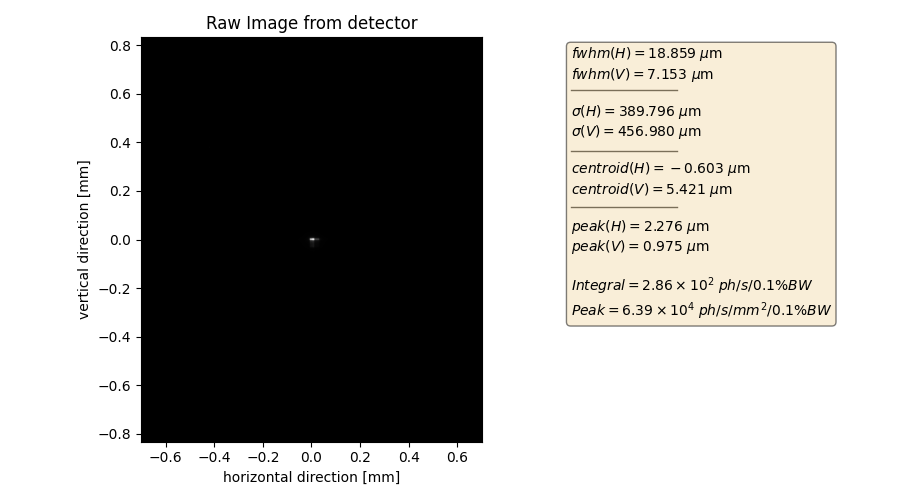

In [21]:
print("Reference best focus")
reference = Image(filename=autoalign_dir / 'Reference_Best_Focus_Manual.png')
display_png(reference)

#### Experiment results

In [22]:
!ls $data_base_dir

peak_lswi_moo_150_2022-11-19_images
peak_lswi_moo_150_2022-11-19_steps
peak_lswi_moo_autofocusing.ini
peal_lwsi_moo_optimization_final_150_2022-11-19_11:20.gz


In [28]:
log_file = Path(data_base_dir / 'peal_lwsi_moo_optimization_final_150_2022-11-19_11:20.gz')
log_file.exists()

True

In [37]:
hist_dir = Path(data_base_dir / 'peak_lswi_moo_150_2022-11-19_steps')
hist_dir.exists()

True

In [38]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-20 21:07:20,992] A new study created in memory with name: no-name-a8b345c6-44f6-43fd-8732-f1a8cd1481f2


Assuming minimization for all objectives.


In [39]:
n_steps = len(study.trials)

In [40]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [41]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [42]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[135, 146, 148]
92 [0.003218709586597259, 19.311848552295128]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906195083059209, 'h_fwhm': 0.03381565539601894, 'h_centroid': -0.00012366722861434365, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.4579433182873298, 'v_fwhm': 0.054621336459557135, 'v_centroid': 0.006923848402504734, 'v_peak': -0.0022758890191481784, 'integral_intensity': 284.5155714539091, 'peak_intensity': 24772.4, 'gaussian_fit': {}}}


Trial number 29
Trial values: peak_distance 1.013e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3902956970550462, 'h_fwhm': 0.034465956461326996, 'h_centroid': 0.0007357763693062735, 'h_peak': 0.007478462251042083, 'v_sigma': 0.4576046091543913, 'v_fwhm': 0.016906604142243875, 'v_centroid': 0.005219573688912765, 'v_peak': 0.006827667057444239, 'integral_intensity': 284.91664653423754, 'peak_intensity': 37917.312, 'gaussian_fit': {}}}


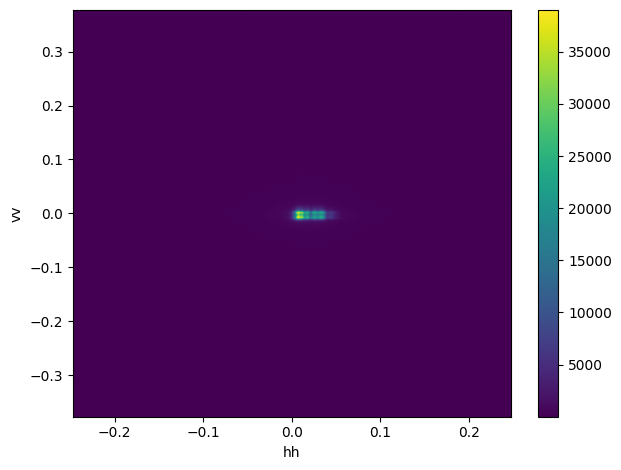

Trial number 47
Trial values: peak_distance 4.338e-03 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39040938633774264, 'h_fwhm': 0.034465956461326996, 'h_centroid': 0.00033048072367911074, 'h_peak': 0.0042269569245020535, 'v_sigma': 0.4574855494804431, 'v_fwhm': 0.016256350136772957, 'v_centroid': 0.005644203543440224, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.9557527077244, 'peak_intensity': 37391.0, 'gaussian_fit': {}}}


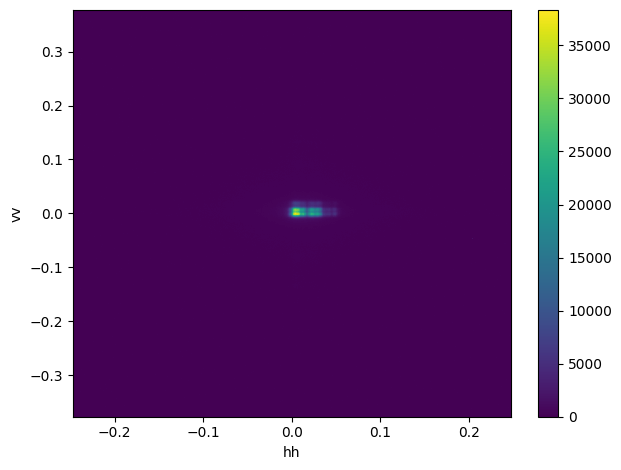

Trial number 92
Trial values: peak_distance 3.219e-03 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906195083059209, 'h_fwhm': 0.03381565539601894, 'h_centroid': -0.00012366722861434365, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.4579433182873298, 'v_fwhm': 0.054621336459557135, 'v_centroid': 0.006923848402504734, 'v_peak': -0.0022758890191481784, 'integral_intensity': 284.5155714539091, 'peak_intensity': 24772.4, 'gaussian_fit': {}}}


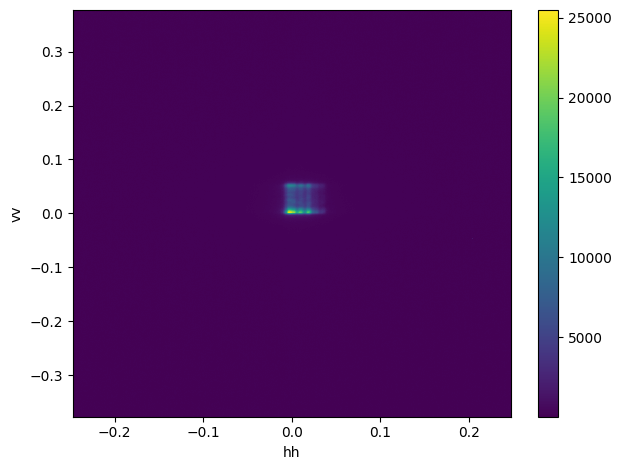

In [43]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85835/1693800501.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "lwsi"], include_dominated_trials=False)


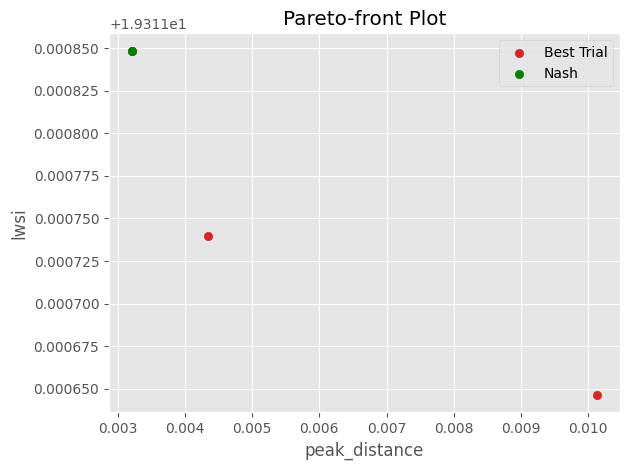

In [46]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "lwsi"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='green', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85835/3765395746.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


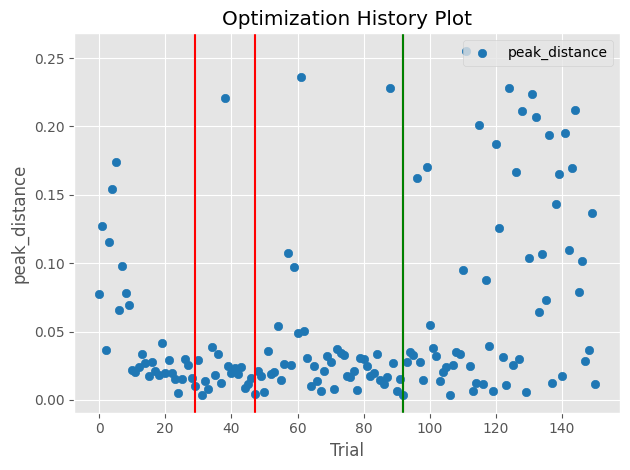

In [47]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85835/1916859156.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")


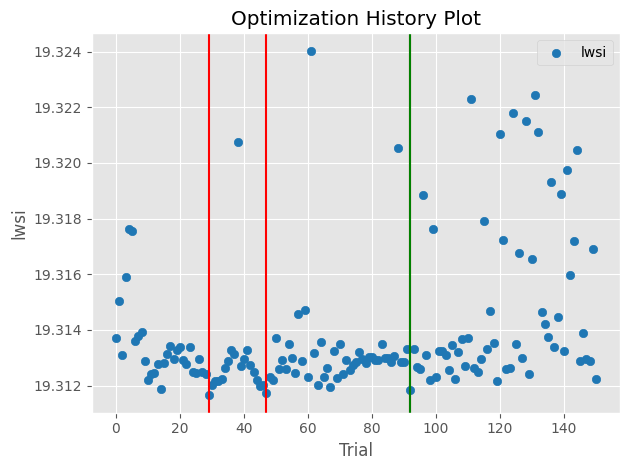

In [50]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [51]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85835/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


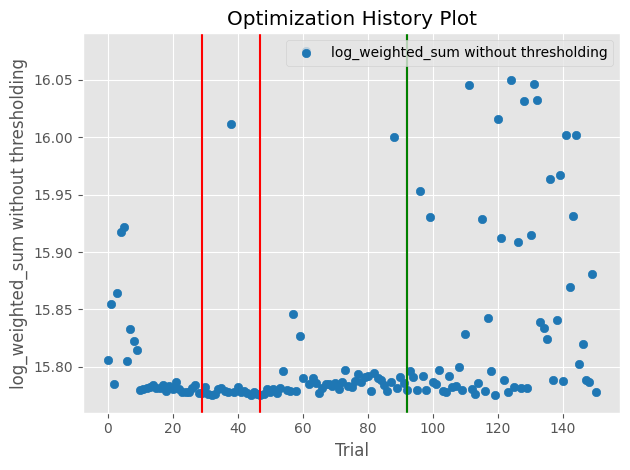

In [52]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85835/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


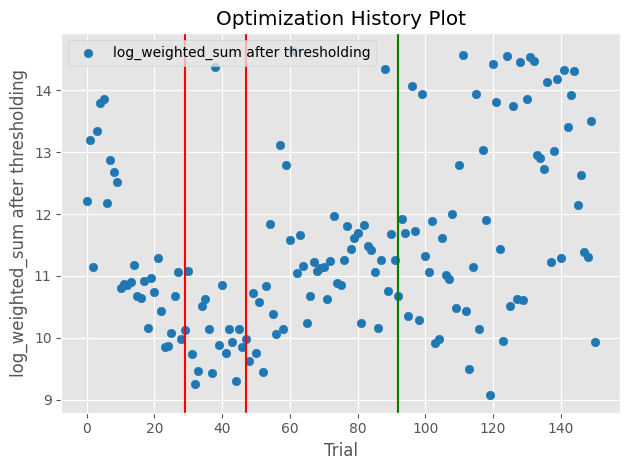

In [53]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [54]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

31


31 [0.003591147252024175, 9.730177181797615]


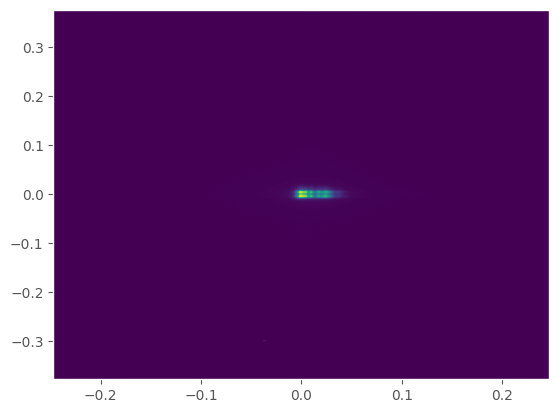

92 [0.003218709586597259, 10.673057372746362]


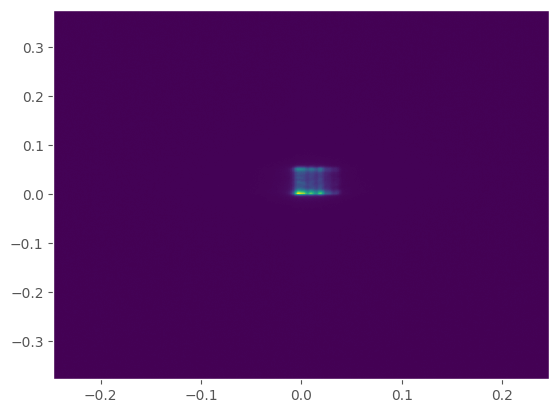

119 [0.006835404912380424, 9.066711370402402]


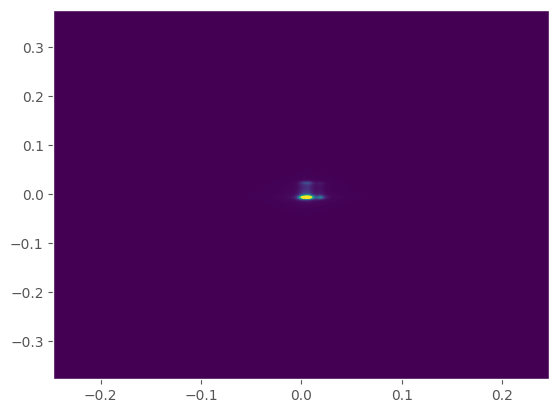

In [55]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [56]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

119 140


24 [0.0048877321579773175, 0.037834539659595816, 9.872197480508158]


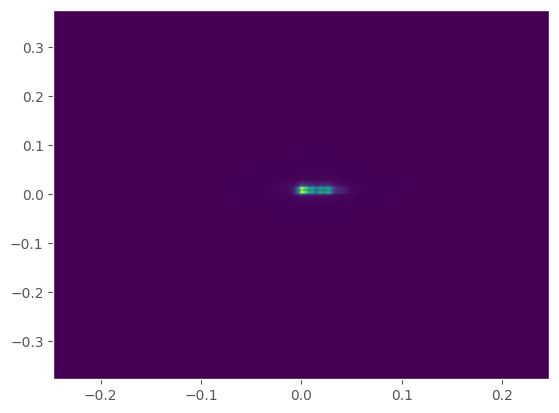

31 [0.003591147252024175, 0.03902303101977523, 9.730177181797615]


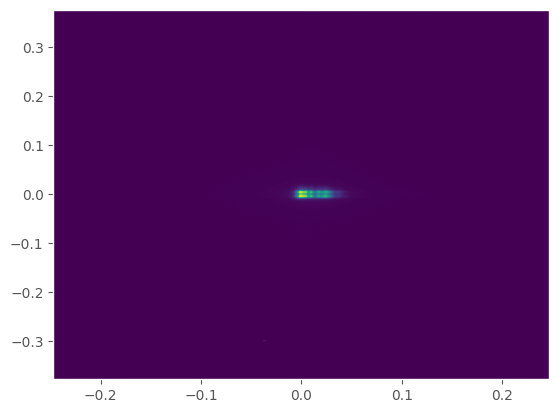

47 [0.004338033304709114, 0.0381073624718826, 9.973196508543614]


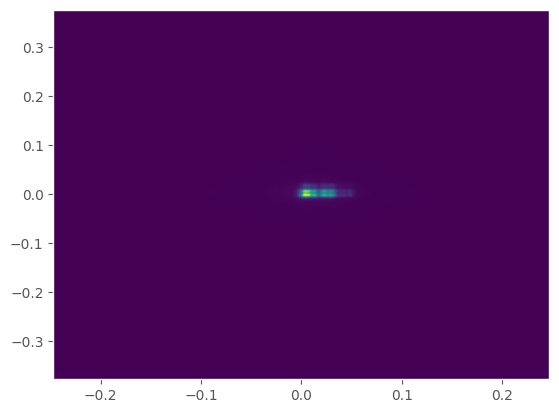

58 [0.025324063159897308, 0.01382502364350689, 10.138000317408826]


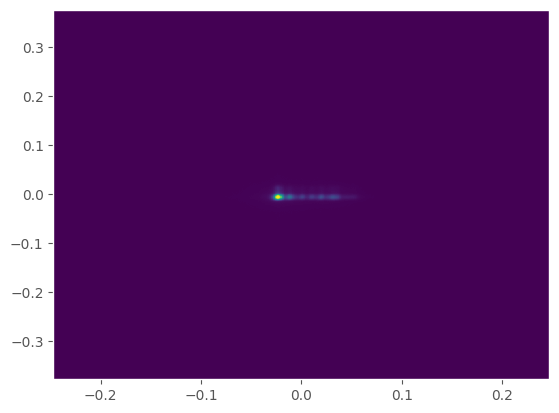

67 [0.006453853459412685, 0.022684799068446875, 11.222073817218536]


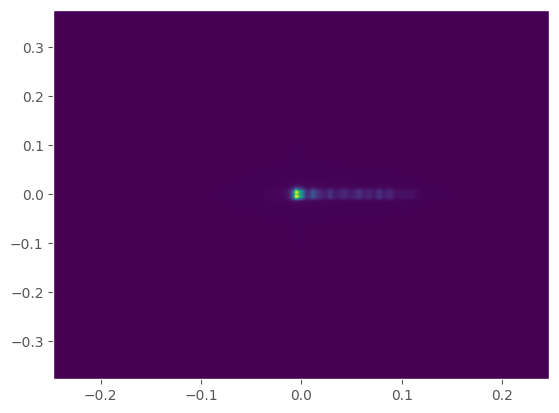

92 [0.003218709586597259, 0.06424164495473672, 10.673057372746362]


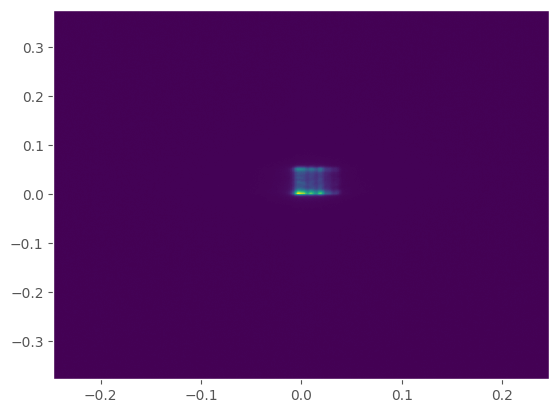

119 [0.006835404912380424, 0.015728404236550825, 9.066711370402402]


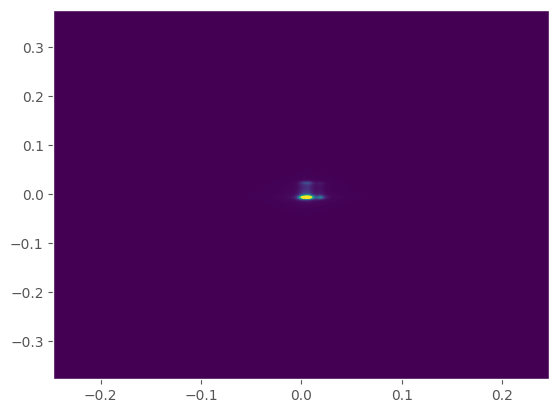

In [57]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()